In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/tips.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [7]:
# 빈도표
party_counts = pd.crosstab(df['day'], df['size'])
print(party_counts)

# 피벗 테이블
pt = pd.pivot_table(df, index='day',
               columns='size', # 테이블사이즈
               values='total_bill',
               aggfunc='count', fill_value=0)
print(pt)

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3
size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3


In [8]:
pc_25 = party_counts.loc[:,2:5]
pc_25.sum(1)

# pc_25 각 열방향 합계 1로 정규화
pc_25.apply(lambda x:x/pc_25.sum(1))
pc_25.div(pc_25.sum(1),axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


팁이 10이고 총 청구 금액이 100인 경우, 팁의 퍼센트를 마크업과 마진으로 계산한 결과는 다음과 같습니다:

마크업 (Markup): 약 11.11%
- 마크업은 기본 비용에 대한 추가 비용(여기서는 팁)의 비율
- Tip / (Total Bill - Tip) x 100

마진 (Margin): 10%
- 마진은 전체 판매 가격(여기서는 총 청구 금액)에 대한 추가 비용(팁)의 비율
- Tip / Total Bill x 100

마크업은 순수한 비용(총 금액에서 팁을 제외한 금액)에 대한 추가 비용의 비율을, 마진은 전체 금액에 대한 추가 비용의 비율

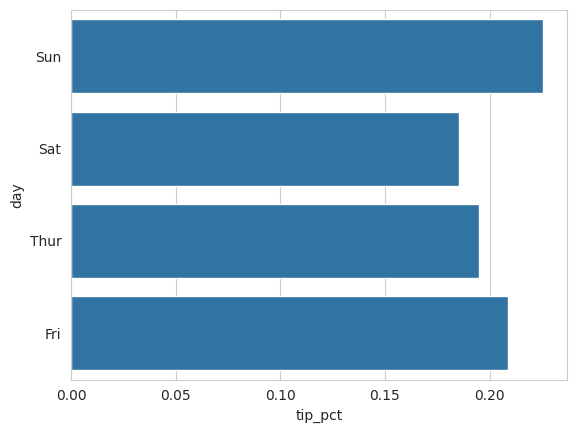

In [9]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns

df['tip_pct'] = df['tip'] / (df['total_bill'] - df['tip']) # 팁 비중
sns.barplot(x='tip_pct', y='day', data=df, orient='h', errorbar=None) # errorbar는 오차 막대를 제어
plt.show()

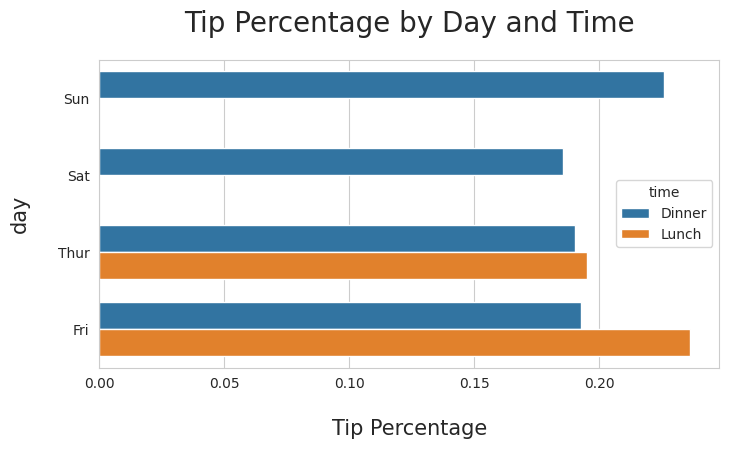

In [24]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.barplot(x='tip_pct', y='day',hue='time',data=df, orient='h', errorbar=None, width=0.7)
plt.title('Tip Percentage by Day and Time', pad=20, size=20)
plt.xlabel('Tip Percentage', labelpad=20, fontsize=15)
plt.ylabel('day', labelpad=20, fontsize=15)

plt.show()

In [14]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

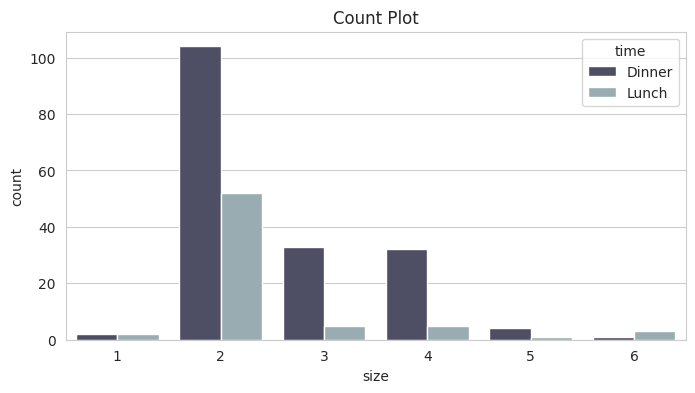

In [3]:
# Seabon으로 CountPlot 그리기
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='size', data=df, hue='time', palette='bone')
plt.title('Count Plot')
plt.show()

커널밀도추정(Kernel Density Estimation, KDE)
- kde=True는 Seaborn의 histplot 함수에서 커널 밀도 추정(Kernel Density Estimation, KDE)을 활성화하는 옵션
- 히스토그램과 함께 데이터의 분포를 부드럽게 추정한 커널 밀도 그래프가 표시
- KDE 그래프는 데이터 포인트들이 어떻게 분포되어 있는지 시각적으로 보여주는 부드러운 곡선을 생성

<Axes: ylabel='Count'>

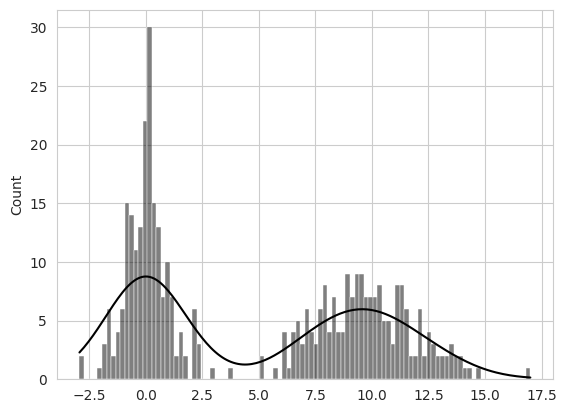

In [25]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))

sns.histplot(values, bins=100, color='k', kde=True)

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<Axes: xlabel='length', ylabel='Count'>

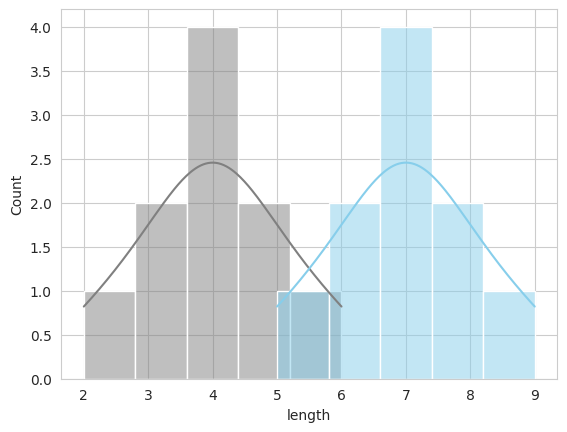

In [8]:
# Q. 두개의 정규분포를 따르는 상이한 데이터셋을 생성 후
# 하나의 데이터 셋으로 병합한 후 시각화 하여 데이터의 분포를 확인하세요

df = pd.read_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/fm2.csv')

length_a = df.query('species=="A"')['length']
length_b = df.query('species=="B"')['length']
sns.set_style('whitegrid')
sns.histplot(length_a, bins=5, color='gray', kde=True)
sns.histplot(length_b, bins=5, color='skyblue', kde=True)

<Axes: xlabel='species', ylabel='length'>

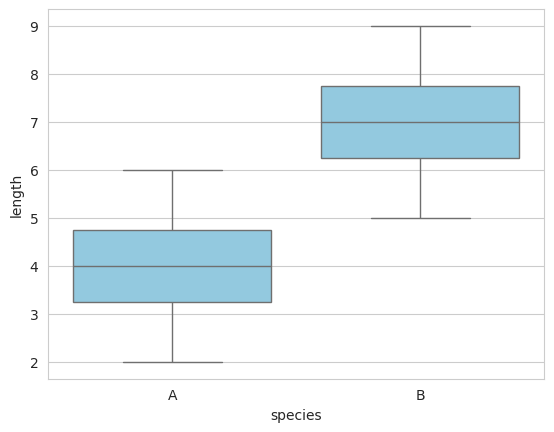

In [10]:
# Q. box plot으로 length_a, length_b 비교

sns.boxplot(x='species', y='length', data=df, color='skyblue')

<Axes: xlabel='species', ylabel='length'>

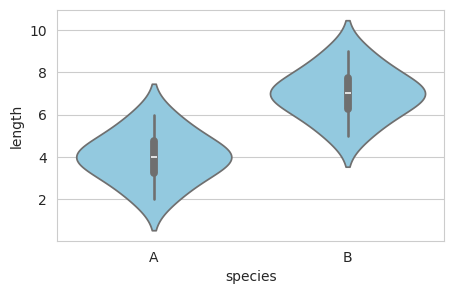

In [12]:
# 바이올린 플롯
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
plt.figure(figsize=(5,3))
sns.violinplot(x='species',y='length', data=df, color='skyblue')

<Figure size 1000x400 with 0 Axes>

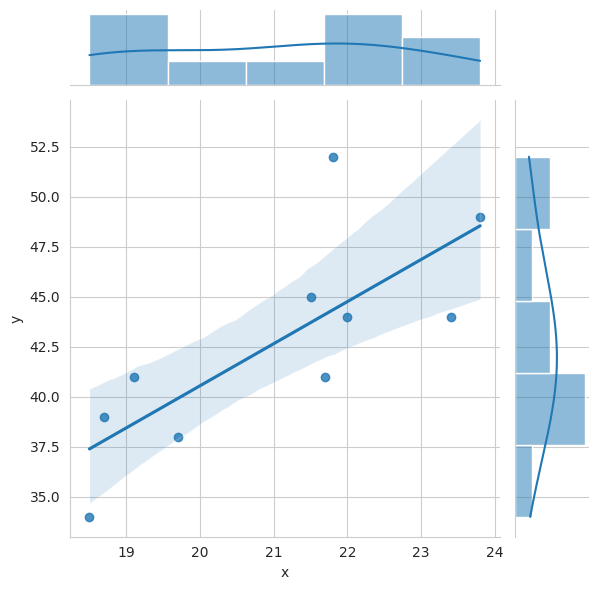

In [15]:
df = pd.read_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/cov.csv')

# joinplot은 산점도, 히스토그램, kde, 추세선을 모두 볼 수 있다.

#plt.figure(figsize=(10,4))
sns.jointplot(x='x',y='y',data=df, kind='reg') # reg : 추세선
plt.show()

sns.lmplot과 sns.regplot 차이점

기능적 차이:
- sns.lmplot: 이 함수는 FacetGrid를 사용하여 데이터를 다양한 카테고리별로 분할하여 여러 서브플롯을 만들 수 있다. 이는 데이터의 서브셋에 대한 회귀선을 별도로 그릴 수 있음을 의미.
sns.regplot: 이 함수는 단일 축 객체(ax)에 회귀선을 그리는 데 사용. 간단하고, 한 번에 하나의 관계만 표시.

사용상의 유연성:
- sns.lmplot은 regplot보다 더 많은 매개변수를 제공하여, 데이터를 세분화하고 다양한 방식으로 표시.
- sns.regplot은 더 단순하고 직관적인 옵션을 제공하여, 빠르고 간편하게 선형 회귀선을 그릴 수 있게 한다.

그래픽 표현의 차이:
- sns.lmplot은 내부적으로 FacetGrid를 사용하므로, 플롯의 구성과 스타일을 더 세밀하게 조정할 수 있다.
- sns.regplot은 주로 간단한 선형 관계를 표시하는데 적합하며, 복잡한 그래픽 설정은 제한적.



In [16]:
# x와 y열을 데이터 포인트로 사용하고, category 열에 따라 서로 다른 색상의 선현 회귀선을 그립니다.
# 각 카테고리(A와 B)에 대한 회귀선이 서로 다른 색상으로 표시

# 임의의 데이터 생성
np.random.seed(10)
data = pd.DataFrame({
  'x' : np.random.rand(50),
  'y' : np.random.rand(50),
  'category' : np.random.choice(['A', 'B'], 50)
})
data.head()

,x,y,category
0,0.771321,0.392529,A
1,0.020752,0.093460,A
2,0.633648,0.821106,B
3,0.748804,0.151152,B
4,0.498507,0.384114,A


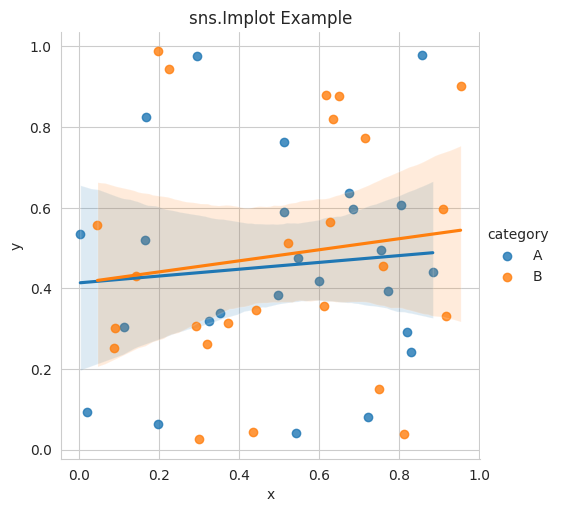

<function matplotlib.pyplot.show(close=None, block=None)>

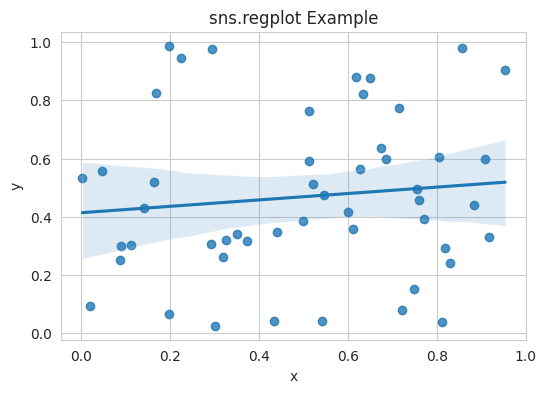

In [18]:
# sns.Implt 사용 예시
sns.lmplot(data=data, x='x', y='y', hue='category')
plt.title('sns.Implot Example')
plt.show()

# sns.regplot 사용 예시
plt.figure(figsize=(6,4))
sns.regplot(x='x', y='y', data=data)
plt.title('sns.regplot Example')
plt.show()

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/auto-mpg.xlsx')

<Axes: xlabel='mpg'>

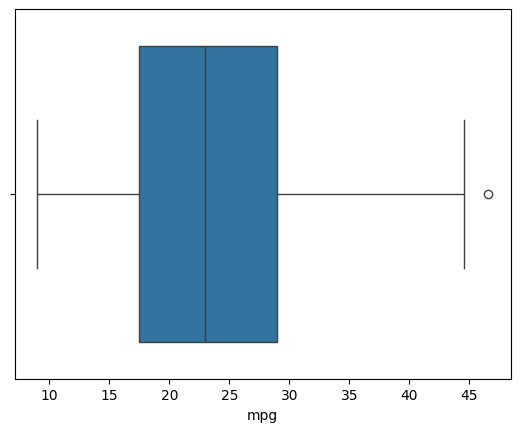

In [8]:
sns.boxplot(data=df, x='mpg')

<Axes: xlabel='mpg'>

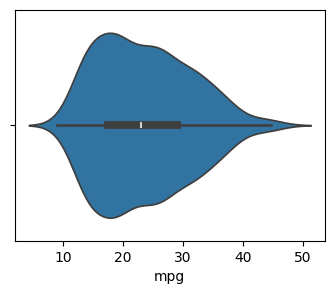

In [10]:
plt.figure(figsize=(4,3))
sns.violinplot(data=df, x='mpg')

- sns.lineplot() 함수에서는 err_style 매개변수를 이용해 밴드의 스타일을 조정할 수 있습니다.
- 예를 들어, err_style='band'로 설정하면, 투명한 밴드가 그려지고, err_style='bars'로 설정하면, 오차 막대(error bar)가 그려집니다.

<Axes: xlabel='model year', ylabel='mpg'>

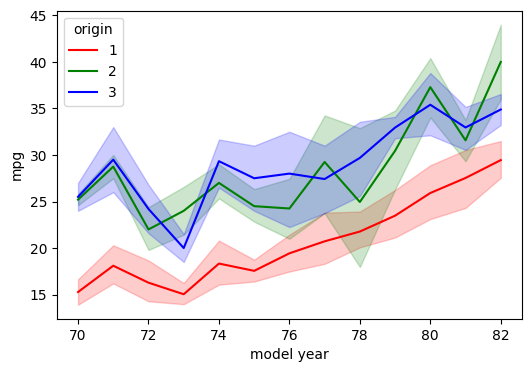

In [11]:
# origin에 따라 세가지로 나눠주고 오차범위를 다른 색상으로 밴드화하여 보여준다.

plt.figure(figsize=(6,4))
sns.lineplot(data=df, x='model year', y='mpg', hue='origin', err_style='band',
             palette=['red', 'green', 'blue'])

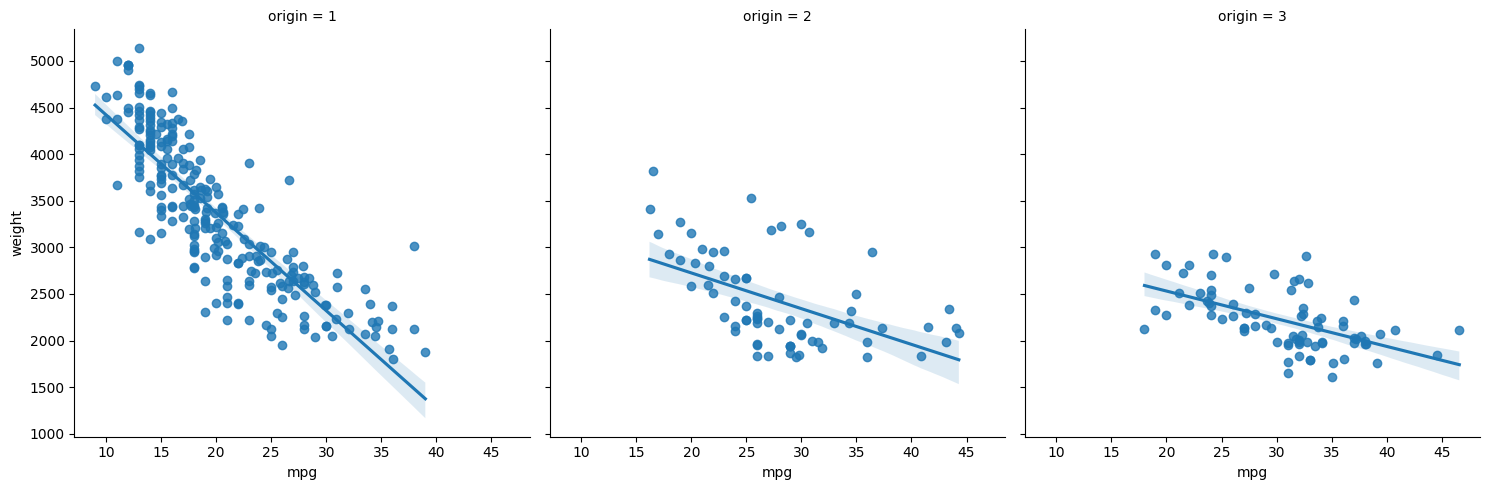

In [12]:
#mpg와 weight의 관계, 1행 2열로 표시
# 첫 번째 열 : 전체 데이터에 대한 그래프

# col_wrap=3은 한 행에 최대 3개의 그래프를 표시하도록 설정
sns.lmplot(x='mpg', y='weight', data=df, col='origin', col_wrap=3)

plt.show()

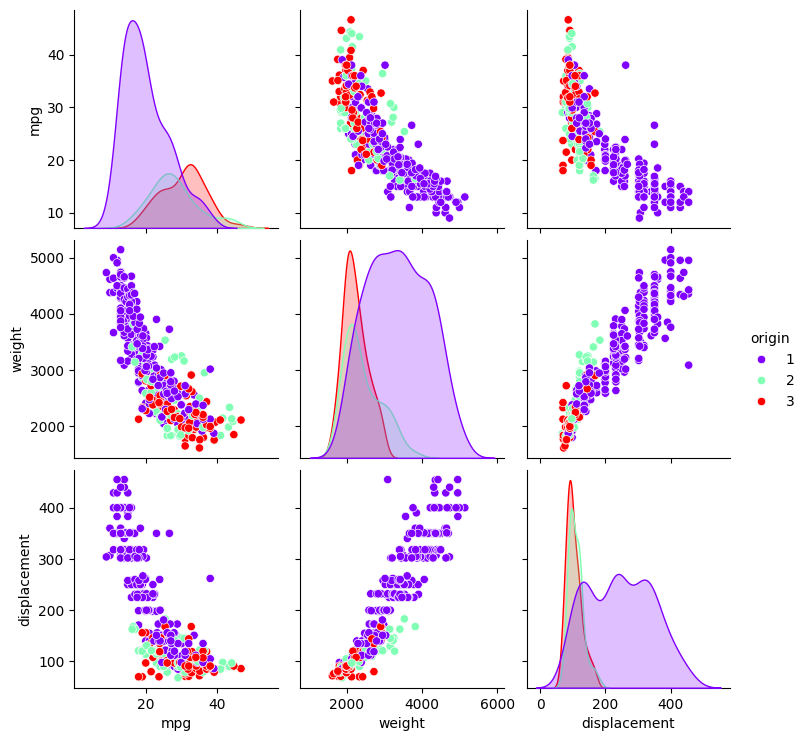

In [15]:
# 상관관계를 산점도로 보여주는 pairplot
# 대각선은 자기 자신

sns.pairplot(df[['mpg', 'weight', 'displacement','origin']], palette='rainbow', hue='origin', diag_kind='kde')

In [17]:
df = sns.load_dataset('titanic')

df[['pclass', 'age', 'fare', 'survived']].corr()

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


Text(0.5, 1.0, 'Heatmap of the Dataset')

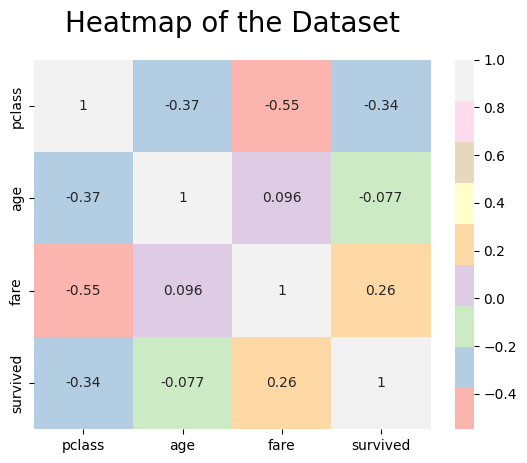

In [18]:
sns.heatmap(df[['pclass', 'age', 'fare', 'survived']].corr(), annot=True, cmap='Pastel1')
plt.title('Heatmap of the Dataset', pad=20, fontsize=20)